**1. ADDING REQUIRED LIBRARIES**



In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from sklearn import preprocessing
!pip install --upgrade matplotlib
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2. DATA ANALYSIS**

In [ ]:
data = pd.read_csv("insurance.csv")

▶ The details of the dataset are examined 

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# missing data  
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


❗ Examine the distribution of Bmi (Body Mass Index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

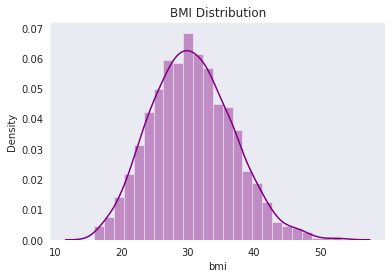

In [ ]:
sns.set_style('dark')
sns.distplot(data['bmi'],color="purple")
plt.title('BMI Distribution')

In [ ]:
print("Average BMI: {:.2f}".format(data['bmi'].mean()))

Average BMI: 30.66


❗ Examine the relationship between “smoker” and “charges” 

Text(0.5, 1.0, 'Charges by Smoking Habits')

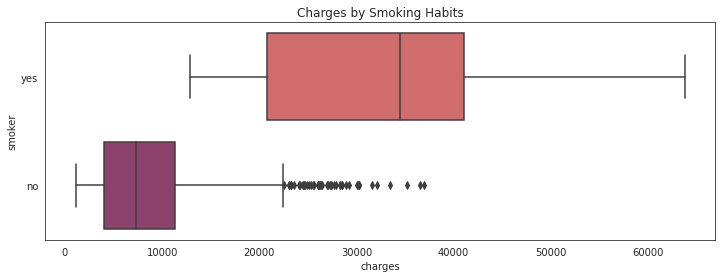

In [ ]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.boxplot(y = data['smoker'], x = data['charges'],palette="flare")
plt.title('Charges by Smoking Habits')

✅ As seen in the boxplot graph, smokers pay more than non-smokers.


❗ Examine the relationship between “smoker” and “region”.

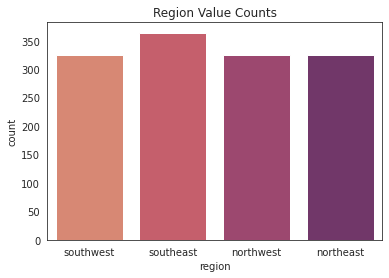

In [ ]:
plt.title('Region Value Counts')
ax = sns.countplot(x = 'region', data = data,palette="flare")

✅ Here we see that there are 4 regions: "soutwest", "southeast", "northwest" and "notheast". Therefore, separate graphs should be created for these four regions.

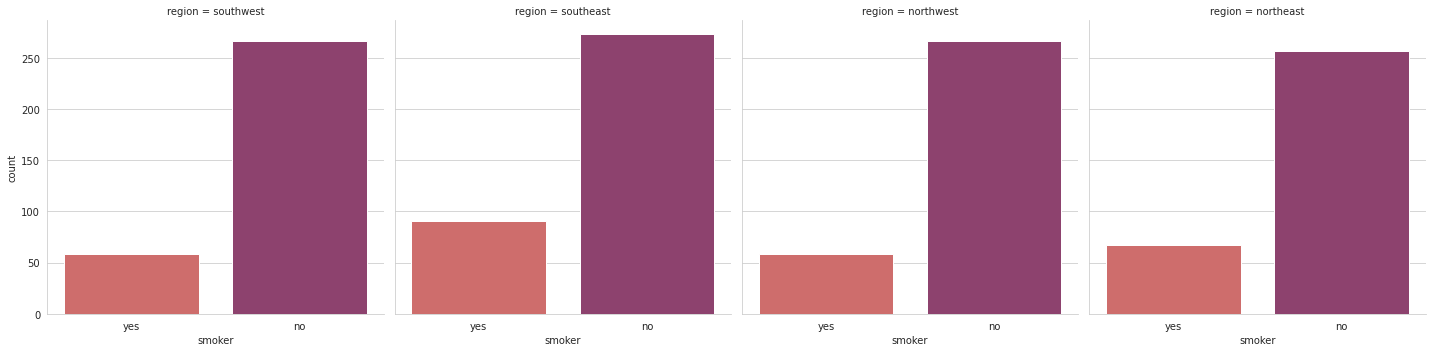

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x = 'smoker', col = 'region', data = data, kind = 'count',palette="flare")

✅ In the chart above, it is seen that the most smoking area is the "southeast"


❗ Examine the relationship between “bmi” and “sex”.

Firstly, gender distributions are examined.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sex Value Counts')

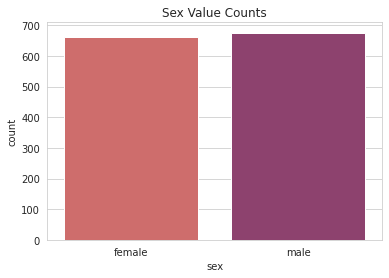

In [ ]:
sns.countplot(data['sex'],palette="flare")
plt.title('Sex Value Counts')

Text(0.5, 1.0, 'Relationship between “bmi” and “sex” ')

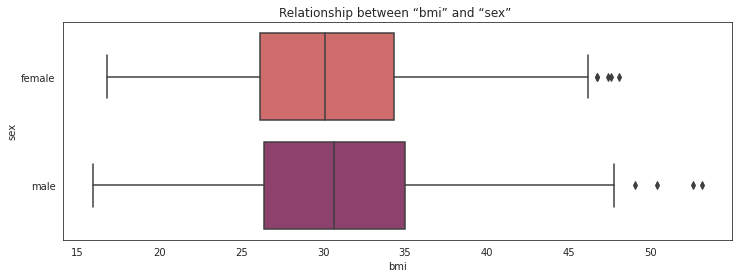

In [ ]:
sns.set_style('white')
plt.figure(figsize = (12, 4))
sns.boxplot(y = data['sex'], x = data['bmi'],palette="flare")
plt.title('Relationship between “bmi” and “sex” ')

✅ In the graph, it is observed that the body mass index of men is generally higher than that of women.

❗ Find the region with the highest number of children.

[Text(0, 0, '339'), Text(0, 0, '373'), Text(0, 0, '382'), Text(0, 0, '371')]

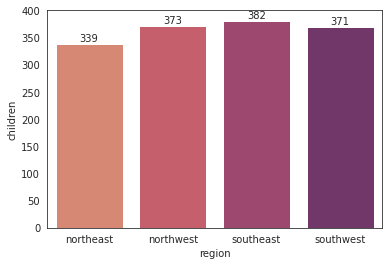

In [ ]:
groupedvalues = data.groupby('region').sum().reset_index()
ax = sns.barplot(x='region', y='children',
                 data=groupedvalues,
                 errwidth=0,palette="flare")
ax.bar_label(ax.containers[0])


✅ The region with the highest number of children is "southeast"

❗ Examine the relationship between “age” and “bmi”.

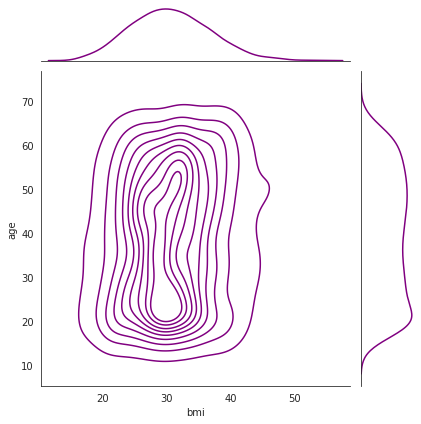

In [ ]:
sns.jointplot(x = 'bmi', y = 'age', data = data, kind = 'kde',color="purple")

✅ We categorize age ranges for a more descriptive visual

In [ ]:
# Age category

data.loc[(data['age'] >= 18) & (data['age'] < 36), 'age_category'] = 'youth'
data.loc[(data['age'] >= 36) & (data['age'] <= 55), 'age_category'] = 'adults'
data.loc[data['age'] > 55, 'age_category'] = 'old'
data['age_category'].value_counts()

youth     574
adults    548
old       216
Name: age_category, dtype: int64

[Text(0, 0, '574'), Text(0, 0, '548'), Text(0, 0, '216')]

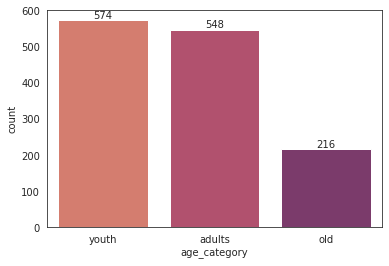

In [ ]:
ax = sns.countplot(x = 'age_category', data = data,palette="flare")
ax.bar_label(ax.containers[0])

Text(0.5, 1.0, 'BMI by age_category')

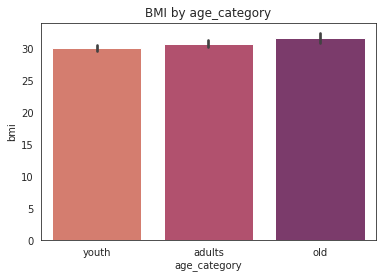

In [ ]:
sns.barplot(x = 'age_category', y = 'bmi', data = data,palette="flare")
plt.title('BMI by age_category')

✅ As can be seen more clearly in this graph, the BMI ratio increases as the age increases.

❗ Relationship between "BMI" and "children"

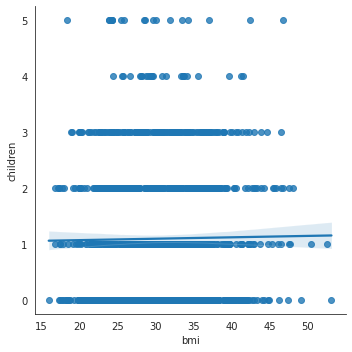

In [ ]:
sns.lmplot(x = 'bmi', y = 'children', data = data)


✅ In order to make this comparison, it is necessary to know whether individuals have children or not

In [ ]:
data.loc[data['children'] > 0, 'with_child'] = 'yes'
data.loc[data['children'] == 0, 'with_child'] = 'no'
data['with_child'].value_counts()

yes    764
no     574
Name: with_child, dtype: int64

[Text(0, 0, '574'), Text(0, 0, '548'), Text(0, 0, '216')]

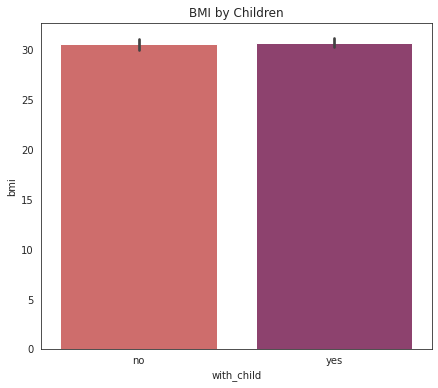

In [ ]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'with_child', y = 'bmi', data = data, palette="flare")
plt.title('BMI by Children')
ax.bar_label(ax.containers[0])

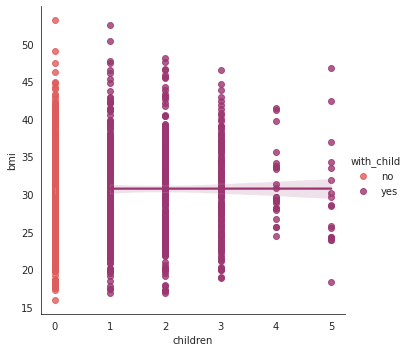

In [ ]:
g = sns.lmplot(x="children", y="bmi", hue="with_child", data=data,palette="flare")

❗ Is there an outlier in the "bmi" variable? 

<AxesSubplot:xlabel='bmi', ylabel='Count'>

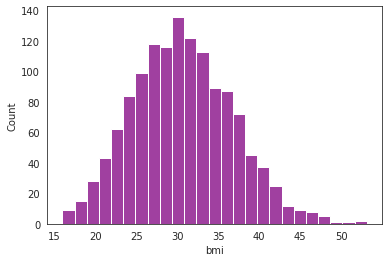

In [ ]:
sns.histplot(data=data, x="bmi",color="purple")

✅ Values ​​50 and above in the chart above are outliers. Because the density is low and the number of data is also low.

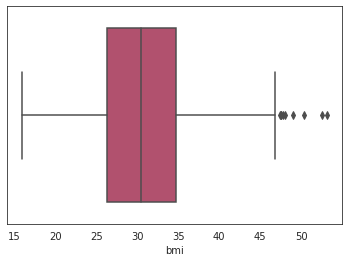

In [ ]:
ax = sns.boxplot(x=data["bmi"],data=data,palette="flare")

✅ As can be seen in the box plot graph, the values ​​on the other side of the line after 45 show outliers.


❗ Examine the relationship between “bmi” and “charges

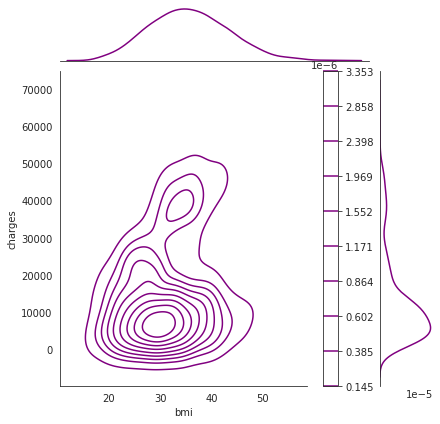

In [ ]:

sns.jointplot(x = 'bmi', y = 'charges',color="purple",data = data, kind = 'kde',legend=True, cbar=True)
plt.show()

✅ As can be seen in the graph in the figure, it is seen that the concentrated area is in the area where the bmi value is 30 and the charges value is between 0 and 10000.

❗ Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

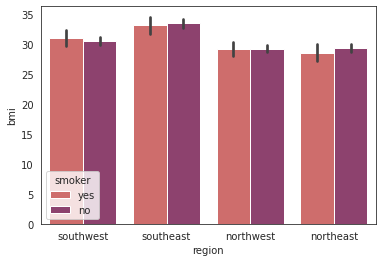

In [ ]:
g = sns.barplot(x="region", y="bmi",hue="smoker", data=data,palette="flare");


✅ The region where the bmi ratio and smokers are above the "bmi" average is seen as the "southeast". However, in the "southeast" region, it is observed that the "bmi" rate of non-smokers is higher than that of smokers.
In addition, in the "northeast" region, where the "bmi" ratio is below the average, it is seen that the "bmi" ratio of non-smokers is higher than that of smokers.

**3. DATA PRE-PROCESSING**

▶ Label Encoding

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


▶ Categorical variables here: sex, smoker, region,age_category,with_child

In [ ]:
objList = data.select_dtypes(include = "object").columns
obj_enc = objList.copy()
print (objList)

Index(['sex', 'smoker', 'region'], dtype='object')


In [ ]:
#Label Encoding on 'region' column
le = preprocessing.LabelEncoder()
data['region'] = le.fit_transform(data.region.values)

In [ ]:
# One hot encoding işlemi için kategorik olan sütunların türünün 'category' olarak değiştirilmesi
data['smoker'] = data['smoker'].astype('category')
data['sex'] = data['sex'].astype('category')
data['smoker_numeric'] = data['smoker'].cat.codes
data['sex_numeric'] = data['sex'].cat.codes

In [ ]:
# One hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['smoker', 'sex']]).toarray())
final_df = data.join(encoder_df)
final_df = final_df.drop(['smoker', 'sex', 0, 1 , 2, 3], axis=1)

▶ **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(final_df[['age','bmi', 'children', 'charges']])
scaled = scaler.fit_transform(final_df[['age','bmi', 'children', 'charges']])
scaled_df = pd.DataFrame(scaled)

final_df[['age']] = MinMaxScaler().fit_transform(np.array(final_df[['age']]).reshape(-1,1))
final_df[['bmi']] = MinMaxScaler().fit_transform(np.array(final_df[['bmi']]).reshape(-1,1))
final_df[['children']] = MinMaxScaler().fit_transform(np.array(final_df[['children']]).reshape(-1,1))
final_df[['charges']] = MinMaxScaler().fit_transform(np.array(final_df[['charges']]).reshape(-1,1))

▶ **Split The Data**

In [ ]:
X = final_df.drop('charges', axis=1)
y = final_df.loc[:, 'charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

NameError: ignored

In [ ]:
X.columns

NameError: ignored

In [ ]:
print(type(y))


<class 'pandas.core.series.Series'>


▶ **Model Functions**

Cross Validation Score function

In [ ]:
from sklearn.model_selection import cross_val_score
def cross_validation(model,model_name):
    print(f'Cross-validation scores for {model_name} model: ', cross_val_score(model, X, y, cv=5))
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    print(f'Accuracy with the {model_name} model: %', "{:.2f}".format(accuracies.mean() * 100), '\n')
    return

In [ ]:
# Score Function
def score(model,model_name):
    print(f'Score for {model_name}: ', model.score(X_test, y_test))

Grid Search function for Hyperparameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
def grid_search(model):
    parameters = {'learning_rate': [0.01, 0.02, 0.03, 0.04],
                  'subsample': [0.9, 0.5, 0.2, 0.1],
                  'n_estimators': [100, 500, 1000, 1500],
                  'max_depth': [4, 6, 8, 10]
                  }
    grid_GBR = GridSearchCV(estimator=model, param_grid=parameters, cv=2, n_jobs=-1)
    grid_GBR.fit(X_train, y_train)

    print(" Results from Grid Search ")
    print("\n The best estimator across ALL searched params:\n", grid_GBR.best_estimator_)
    print("\n The best score across ALL searched params:\n", grid_GBR.best_score_)
    print("\n The best parameters across ALL searched params:\n", grid_GBR.best_params_)

    return grid_GBR.best_params_

In [ ]:
# Linear Regression Model
from sklearn import  linear_model
def linear_regression():
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X_train, y_train)

    model_name = 'Linear Regression'
    score(lin_reg, model_name)
    cross_validation(lin_reg, model_name)
    return

In [ ]:
linear_regression()

Score for Linear Regression:  0.740367716897532
Cross-validation scores for Linear Regression model:  [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Accuracy with the Linear Regression model: % 74.64 



In [ ]:
# Support Vector Regression Model
from sklearn.svm import SVR
def svr_regression():
    svr_lin = SVR(kernel="linear", C=100, gamma="auto")
    svr_lin.fit(X_train, y_train)

    model_name = 'Support Vector Machine Regression'
    score(svr_lin, model_name)
    cross_validation(svr_lin, model_name)
    return

In [ ]:
svr_regression()

Score for Support Vector Machine Regression:  0.7335800989881369
Cross-validation scores for Support Vector Machine Regression model:  [0.75480839 0.69135537 0.75929058 0.72343035 0.74068286]
Accuracy with the Support Vector Machine Regression model: % 73.47 



In [ ]:
# Bayesian-Ridge Regression Model
def bayesian_ridge_regression():
    bay_reg = linear_model.BayesianRidge()
    bay_reg.fit(X_train, y_train)

    model_name = 'Bayesian Ridge Regression'
    score(bay_reg, model_name)
    cross_validation(bay_reg, model_name)
    return

In [ ]:
bayesian_ridge_regression()

Score for Bayesian Ridge Regression:  0.7402873760137194
Cross-validation scores for Bayesian Ridge Regression model:  [0.76122588 0.70866486 0.77759698 0.73371363 0.75510568]
Accuracy with the Bayesian Ridge Regression model: % 74.64 



In [ ]:
# Kernel-Ridge Regression Model
from sklearn.kernel_ridge import KernelRidge
def kernel_ridge():
    kernel_reg = KernelRidge(alpha=1.0)
    kernel_reg.fit(X_train, y_train)
    model_name = 'Kernel Ridge Regression'
    score(kernel_reg,model_name)
    cross_validation(kernel_reg,model_name)
    return


In [ ]:
kernel_ridge()

Score for Kernel Ridge Regression:  0.7311842926496361
Cross-validation scores for Kernel Ridge Regression model:  [0.75329618 0.71122494 0.76965586 0.7295183  0.74804779]
Accuracy with the Kernel Ridge Regression model: % 74.28 



In [ ]:
# Gradient Boosted Regression Model
from sklearn.ensemble import GradientBoostingRegressor

def gradient_boosted_regression():
    # params = {'learning_rate': 0.03, 'max_depth' : 4, 'n_estimators': 100, 'subsample': 0.9 }

    gb_regression = GradientBoostingRegressor() #**params
    gb_regression.fit(X_train, y_train)

    model_name = 'Gradient Boosted Regression'
    score(gb_regression, model_name)
    cross_validation(gb_regression, model_name)
    return gb_regression


In [ ]:
gradient_boosted_regression()

Score for Gradient Boosted Regression:  0.8642863913937568
Cross-validation scores for Gradient Boosted Regression model:  [0.87517801 0.79152176 0.89408428 0.84897729 0.85971677]
Accuracy with the Gradient Boosted Regression model: % 84.80 



GradientBoostingRegressor()

*   Gradient Boosted Regression model is selected for its Cross Validation Score was the highest




Hyperparameter Optimization for the Gradient Boosted Regression model with GridSearchCV module

In [ ]:

grid_search(gradient_boosted_regression())


Score for Gradient Boosted Regression:  0.8644179819845421
Cross-validation scores for Gradient Boosted Regression model:  [0.87517831 0.79324825 0.89414319 0.84918959 0.85970791]
Accuracy with the Gradient Boosted Regression model: % 84.80 

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.9)

 The best score across ALL searched params:
 0.8441499521765736

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}

In [ ]:
params = grid_search(gradient_boosted_regression())


Score for Gradient Boosted Regression:  0.8644179819845421
Cross-validation scores for Gradient Boosted Regression model:  [0.8751243  0.79061114 0.89422357 0.84897437 0.85965361]
Accuracy with the Gradient Boosted Regression model: % 84.80 

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.2)

 The best score across ALL searched params:
 0.8455955088025998

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}


Evaluating the optimized model by Mean Absolute Error, Mean Squared Error and R Squared metrics

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def optimized_gb_regression(params):

    gb_regression = GradientBoostingRegressor(**params) #**params
    gb_regression.fit(X_train, y_train)

    model_name = 'Gradient Boosted Regression'
    score(gb_regression, model_name)
    cross_validation(gb_regression, model_name)
    predictions = gb_regression.predict(X_test)
    print("MSE (Mean Squared Error): ", mean_squared_error(y_test, predictions))
    print("MAE (Mean Absolute Error): ", mean_absolute_error(y_test, predictions))
    print("R2 (R Squared9: ",r2_score(y_test, predictions))
    return

In [ ]:
optimized_gb_regression(params)

Score for Gradient Boosted Regression:  0.8535454847017001
Cross-validation scores for Gradient Boosted Regression model:  [0.8763796  0.80297083 0.88285102 0.84717117 0.86628868]
Accuracy with the Gradient Boosted Regression model: % 84.83 

MSE (Mean Squared Error):  0.005288123744610541
MAE (Mean Absolute Error):  0.04354714176419675
R2 (R Squared9:  0.8535454847017001
